In [241]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from tqdm.notebook import trange, tqdm

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
order_codes = {
    1: 0,
    2: 50,
    3: 100,
    4: 200,
    5: 400,
    6: 600,
    7: 800
}

In [438]:
selected_order = 1
selected_freq = order_codes[selected_order]
file_path = f'D:\Hella\HARD\zaznam_pwm_{selected_order}.csv'
df = pd.read_csv(file_path, sep=';', index_col=0)

In [439]:
df

,FrameSum,FrameAvg
0,2032569,9
1,2048445,10
2,2033984,9
3,2029411,9
4,2041592,9
...,...,...
8174,2076032,10
8175,2055356,10
8176,2089598,10
8177,2041219,9


In [440]:
# df = df.iloc[3000:3400].reset_index()

In [441]:
df

,FrameSum,FrameAvg
0,2032569,9
1,2048445,10
2,2033984,9
3,2029411,9
4,2041592,9
...,...,...
8174,2076032,10
8175,2055356,10
8176,2089598,10
8177,2041219,9


In [442]:
df.describe()

,FrameSum,FrameAvg
count,8.179000e+03,8179.000000
mean,2.071439e+06,9.850593
std,2.218480e+04,0.356511
min,1.972307e+06,9.000000
25%,2.057134e+06,10.000000
50%,2.072723e+06,10.000000
75%,2.086427e+06,10.000000
max,2.152805e+06,10.000000


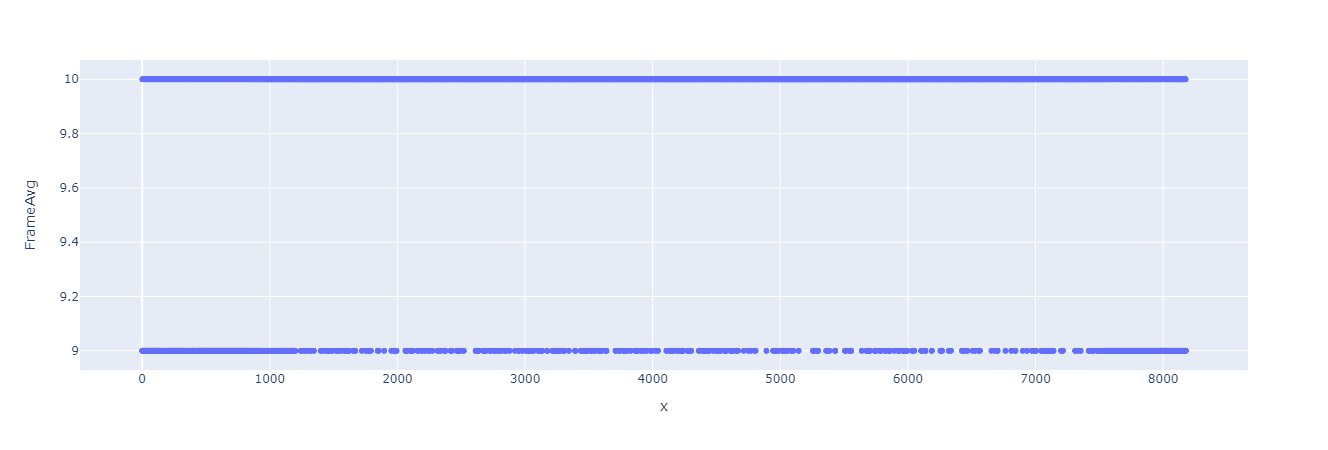

In [443]:
px.scatter(df, y='FrameAvg', x=df.index)

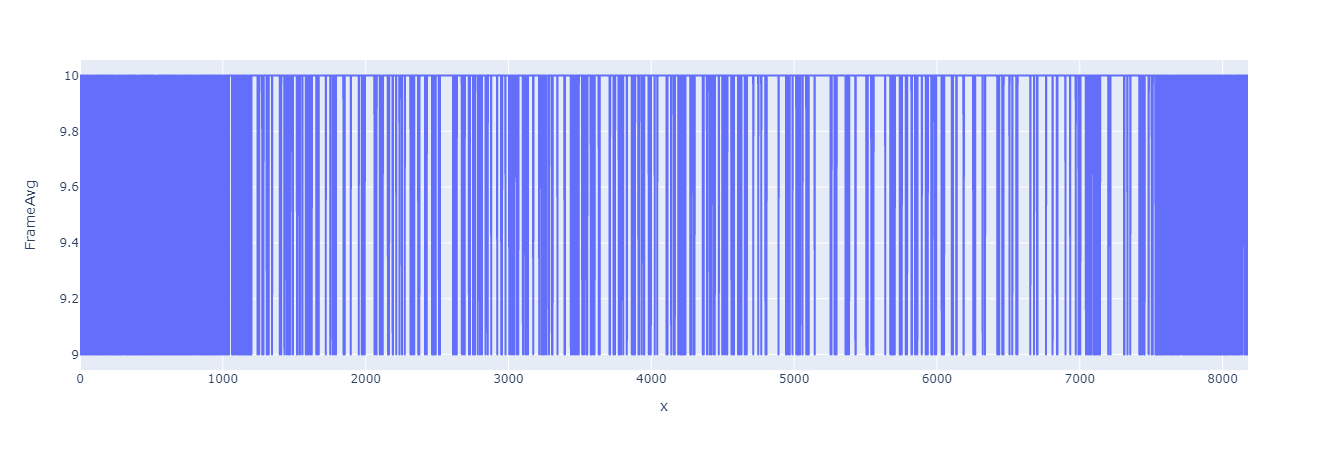

In [444]:
px.line(df, y='FrameAvg', x=df.index)

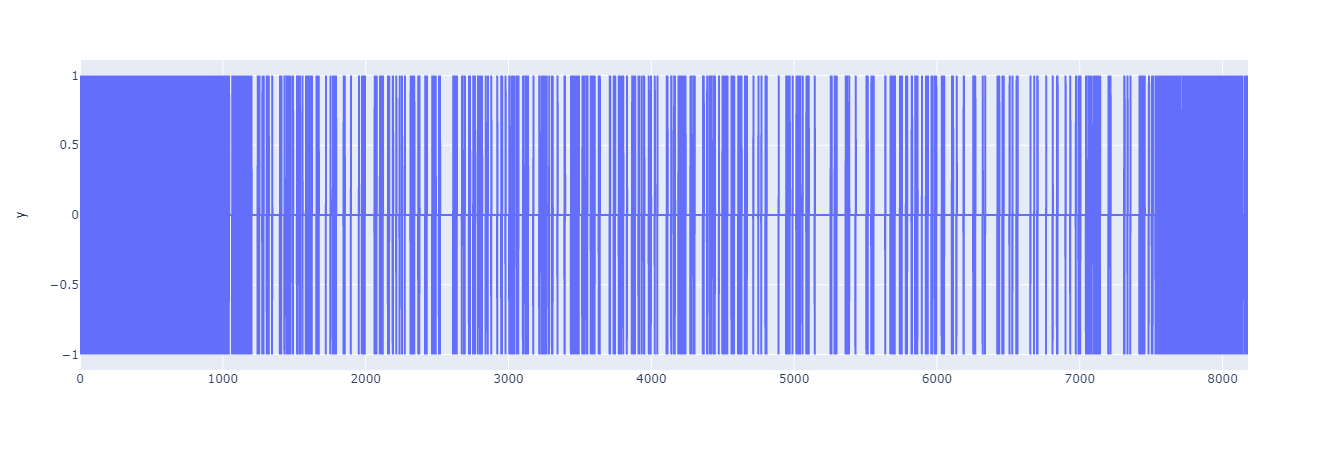

In [445]:
px.line(df, y=df.FrameAvg.diff())

In [446]:
median = df.FrameAvg.median()
median

10.0

In [447]:
sqr_signal = df.FrameAvg.apply(lambda x: 1 if x >= median else 0)

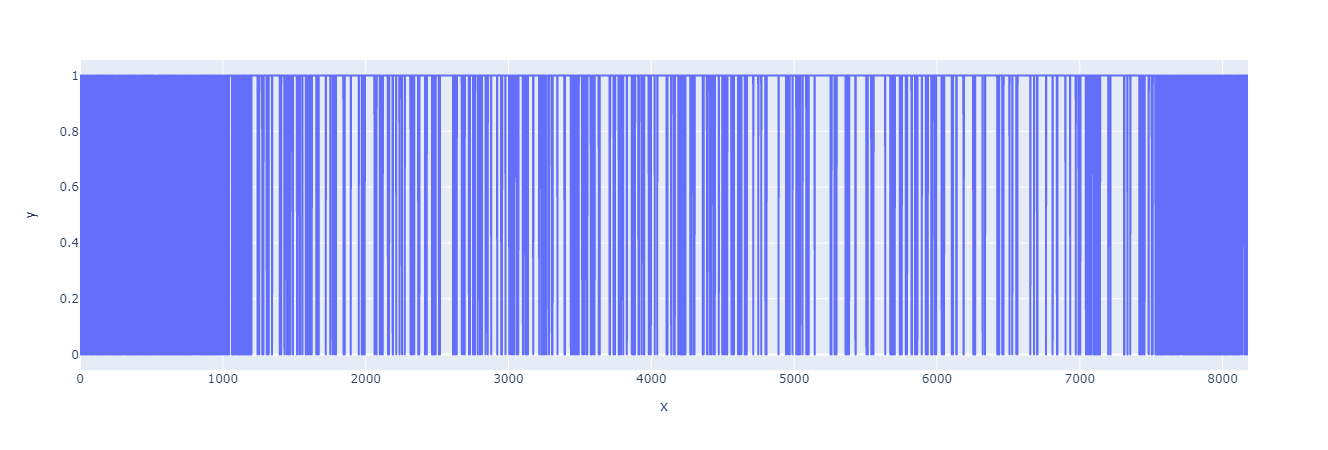

In [448]:
px.line(df, y=sqr_signal, x=df.index)

In [449]:
sqr_signal

0       0
1       1
2       0
3       0
4       0
       ..
8174    1
8175    1
8176    1
8177    0
8178    0
Name: FrameAvg, Length: 8179, dtype: int64

In [450]:
is_edge = [1 if sqr_signal[i] == 0 and sqr_signal[i+1] == 1 else 0 for i in range(len(sqr_signal) - 1)] + [0]

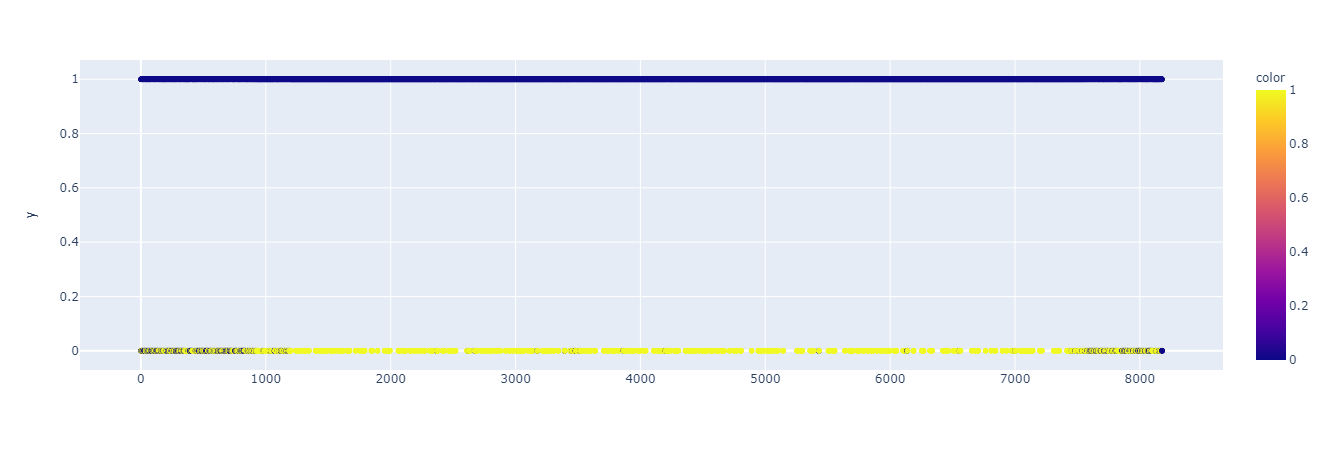

In [451]:
px.scatter(df, y=sqr_signal , color=is_edge)

In [452]:
edge_cnt = np.sum(is_edge)
edge_cnt

799

In [453]:
df.shape[0] / 400

20.4475

In [454]:
freq = edge_cnt/ (df.shape[0] / 400)
freq

39.07568162367037

In [455]:
rolling_freq = pd.Series(is_edge).rolling(400).apply(lambda x: x.sum(), raw=True)

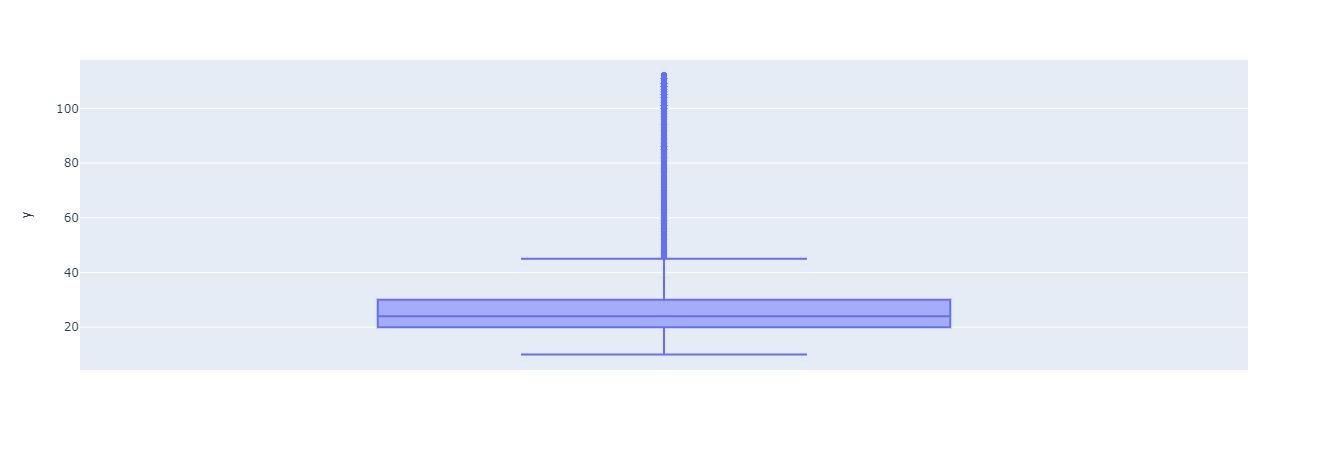

In [456]:
px.box(y=rolling_freq)

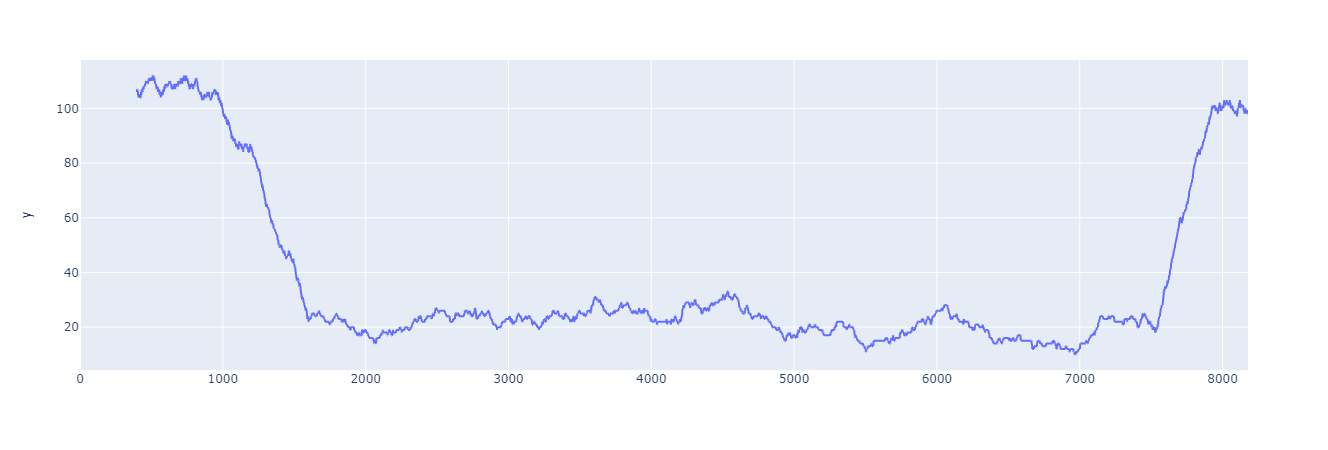

In [457]:
px.line(df, y=rolling_freq)